In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import StandardScaler

In [36]:
data = pd.read_csv('C:/Netology/Machine_Learning/Lecture_11/train_h.csv')

In [37]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
#Разделяем на тренировочные и тестовые данные

data_train, data_test, y_train, y_test = train_test_split(data.drop(columns='SalePrice'), data['SalePrice'], test_size=0.30, random_state=42)

In [39]:
#Находим категориальные признаки

categorials = list(data.dtypes[data.dtypes == object].index)

categorials_nunique = data_train[categorials].nunique()

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию

data[categorials] = data[categorials].fillna('nan')

In [40]:
#отфильтруем непрерывные признаки

integer = [f for f in data if f not in (categorials + ['ID', 'SalePrice'])]

In [41]:
# Создаем дамми-переменные для категорий

dummy_train = pd.get_dummies(data_train[categorials], columns=categorials)
dummy_test = pd.get_dummies(data_test[categorials], columns=categorials)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить

X_train = pd.concat([data_train[integer].fillna(-999), dummy_train], axis=1)

X_test = pd.concat([data_test[integer].fillna(-999), dummy_test], axis=1)

In [42]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MasVnrType_BrkFace,BsmtCond_Po,FireplaceQu_Gd,PoolQC_Fa,Neighborhood_SawyerW,SaleCondition_Family,BsmtFinType1_LwQ,Exterior1st_Stucco,KitchenQual_TA,BsmtCond_Fa
135,136,20,80.0,10400,7,6,1970,1970,288.0,0,...,1,0,1,0,0,0,0,0,1,0
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547,...,1,0,0,0,0,0,0,0,1,0
762,763,60,72.0,8640,7,5,2009,2009,0.0,24,...,0,0,0,0,0,0,0,0,0,0
932,933,20,84.0,11670,9,5,2006,2006,302.0,0,...,0,0,1,0,0,0,0,0,0,0
435,436,60,43.0,10667,7,6,1996,1996,0.0,385,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# X_train_sc = StandardScaler().fit_transform(X_train) # преобразование данных
# X_test_sc = StandardScaler().fit_transform(X_test) # преобразование данных

In [44]:
# Создаем модель RandomForest

clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
# проверяем полученные данные на тренировочных данных

clf_rf.score(X_train, y_train)

0.9769499232032524

In [46]:
# проверяем полученные данные на тестовых данных

clf_rf.score(X_test, y_test)

#Модель получилась не много переобученной

0.8863451259145262

In [47]:
# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю

imp = pd.Series(clf_rf.feature_importances_)

In [48]:
imp.index = pd.Series(X_train.columns)

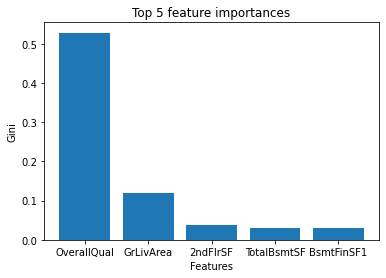

In [49]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.sort_values(ascending=False).head().index, imp.sort_values(ascending=False).head())
plt.show()

## Стекинг

In [50]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV

In [51]:
# Создаем стэккинг и обучаем его на наших данных 

Regressor = StackingRegressor(
    [
        ('LinearRegression', LinearRegression()),
        ('LassoCV', LassoCV()),
        ('DecisionTree', DecisionTreeRegressor()),
        ('ElasticNetCV', ElasticNetCV()),
        ('RidgeCV', RidgeCV())
    ])

In [52]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('LassoCV', LassoCV()),
                              ('DecisionTree', DecisionTreeRegressor()),
                              ('ElasticNetCV', ElasticNetCV()),
                              ('RidgeCV',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

In [53]:
print(f'Score on train data {Regressor.score(X_train, y_train)}')
print(f'Score on test data {Regressor.score(X_test, y_test)}')

for i in Regressor.named_estimators:
    print(f'Score on train data with model {i} {Regressor.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test data with model {i} {Regressor.named_estimators_[i].score(X_test, y_test)}')

Score on train data 0.933311047992063
Score on test data 0.8664640803603334
Score on train data with model LinearRegression 0.9221085403562432
Score on test data with model LinearRegression 0.85338360505793
Score on train data with model LassoCV 0.6928223603294468
Score on test data with model LassoCV 0.7658868514414778
Score on train data with model DecisionTree 1.0
Score on test data with model DecisionTree 0.7503495746206182
Score on train data with model ElasticNetCV 0.56045771857828
Score on test data with model ElasticNetCV 0.6106792924774815
Score on train data with model RidgeCV 0.8938133131135393
Score on test data with model RidgeCV 0.8743353320382551


Лучше всего справилась линейная регрессия.

In [54]:
score_train = {}
score_test = {}

for i in Regressor.named_estimators:
    score_train[i] = Regressor.named_estimators_[i].score(X_train, y_train)
    score_test[i] = Regressor.named_estimators_[i].score(X_test, y_test)

score_train['Total']= Regressor.score(X_train, y_train)
score_test['Total']= Regressor.score(X_test, y_test)

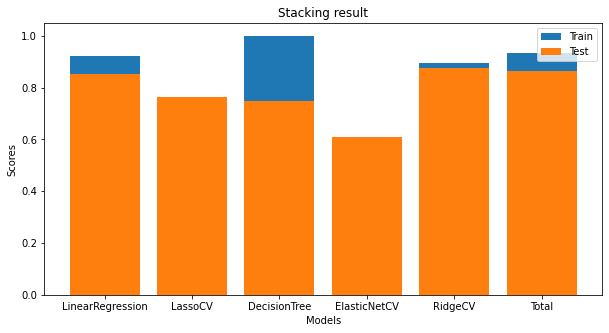

In [55]:
plt.figure(figsize=(10,5))
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

In [56]:
score_train

{'LinearRegression': 0.9221085403562432,
 'LassoCV': 0.6928223603294468,
 'DecisionTree': 1.0,
 'ElasticNetCV': 0.56045771857828,
 'RidgeCV': 0.8938133131135393,
 'Total': 0.933311047992063}

In [57]:
score_test

{'LinearRegression': 0.85338360505793,
 'LassoCV': 0.7658868514414778,
 'DecisionTree': 0.7503495746206182,
 'ElasticNetCV': 0.6106792924774815,
 'RidgeCV': 0.8743353320382551,
 'Total': 0.8664640803603334}